Importando Librerías

In [1]:
#!/usr/bin/python
import math
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from math import floor
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt

Cargado NRC Lexicon de Emociones

In [2]:
n = open("emmod_potter/ginger_and_pickles.emmood", 'r+')
linea = n.readline()
pal_senti_emoci = []
nrc_lexicon = []

Transformando Lexicon a vectores

In [5]:
#No olvides :Añadir un enter al ultimo elemento de nrc.txt
while linea != "\n":
    tokens = nltk.word_tokenize(linea)
    for token in tokens:
        pal_senti_emoci.append(token)
    nrc_lexicon.append(pal_senti_emoci)
    pal_senti_emoci = []
    linea = n.readline()
n.close()

Definiendo 7 emociones básicas + 2 sentimientos

In [6]:
positive = 0 
negative = 0
anger = 0 
fear = 0 
surprise = 0 
sadness = 0 
joy = 0  
disgust = 0

Funcion de conteo de emociones

In [7]:
def _nrc(pal_novela):
    #print ("Pal analizada:  "+pal_novela)
    global positive 
    global negative 
    global anger  
    global fear  
    global anticipation 
    global trust 
    global surprise 
    global sadness 
    global joy  
    global disgust
    global num_pal 
    global num_pal_emo 
 
    for emoWord in nrc_lexicon:
        if emoWord[0] == pal_novela:
            num_pal_emo += 1
            if emoWord[1] == "1":
                positive += 1
            if emoWord[2] == "1":
                negative += 1
            if emoWord[3] == "1":
                #print("anger"," con ", pal_novela)
                anger += 1
            #if emoWord[4] == "1":
                #anticipation += 1
            if emoWord[5] == "1":
                #print("disgust"," con ", pal_novela)
                disgust += 1
            if emoWord[6] == "1":
                #print("fear"," con ", pal_novela)
                fear += 1
            if emoWord[7] == "1":
                #print("joy"," con ", pal_novela)
                joy += 1
            if emoWord[8] == "1":
                #print("sadness"," con ", pal_novela)
                sadness += 1
            if emoWord[9] == "1":
                #print("surprise"," con ", pal_novela)
                surprise += 1
            #if emoWord[10] == "1":
                #trust += 1

Compila lo siguiente, si vas a cambiar de libro, para que se limpie

In [8]:
positive = 0 
negative = 0
anger = 0 
fear = 0 
surprise = 0 
sadness = 0 
joy = 0 
disgust = 0
num_pal = 0
num_pal_emo = 0

Leyendo toda el texto

In [12]:
stopWords = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
stemmer = SnowballStemmer("english") #improve
libro = "Tales/bones.txt"
f = open(libro, 'r+')
linea = f.readline()
while linea != "":    
    if len(linea) > 1:
            #print(linea)
            tokens = tokenizer.tokenize(linea)
            for token in tokens:
                token = token.lower()
                if not token in stopWords:
                    token = stemmer.stem(token)
                    if not token.isdigit():
                        num_pal += 1 
                        _nrc(token)                    
        
    linea = f.readline()
f.close()
Palabras_SS = num_pal #Valor necesario para SubSeccion
print("done...")

done...


In [13]:
print (anger)
print (fear)
print (surprise)
print (sadness)
print (joy)
print (disgust)

1036
1461
1102
1945
2093
769


In [14]:
print ("anger = ",anger)
print ("fear = ",fear)
print ("surprise = ",surprise)
print ("sadness = ",sadness)
print ("joy = ",joy)
print ("disgust = ",disgust)
print("\n")
print ("positives = ",positive)
print ("negatives = ",negative)
print ("pal_total = ",num_pal)

anger =  1036
fear =  1461
surprise =  1102
sadness =  1945
joy =  2093
disgust =  769


positives =  4100
negatives =  3144
pal_total =  47559


Calculando Activity score && Joy-Sad de todo el texto

In [12]:
activas = (joy/num_pal + anger/num_pal) 
pasivas = sadness/num_pal
print("activity: ",(round(activas-pasivas,3)))
print("joy-sad: ",round(joy/num_pal - sadness/num_pal,4))

activity:  0.025
joy-sad:  0.0031


Leyendo el texto po subsseciones

In [15]:
def read_novel_secction(pal_novela,batch,sections):
    global libro
    global anger
    global fear
    global surprise
    global sadness 
    global joy  
    global disgust 
    global num_pal_emo
    
    num_pal = 0
    num_pal_emo = 0
    sec = 1
    anger = 0 
    fear = 0 
    surprise = 0 
    sadness = 0 
    joy = 0  
    disgust = 0
    
    de1 = []
    de2 = []
    #----
    doe = []
    dee = []
    #----
    de2 = []
    dee2 = []
    #--
    anger_points = []
    joy_points = []
    sadness_points = []
    eje_y = []
    f = open(libro, 'r+')
    linea = f.readline()
    while linea != "":    
        if len(linea) > 1:
                tokens = tokenizer.tokenize(linea)
                for token in tokens:
                    token = token.lower()
                    if not token in stopWords:
                        token = stemmer.stem(token)
                        if not token.isdigit():
                            num_pal += 1 
                            _nrc(token)  
                        if num_pal == batch:
                            print("--------------",sec," con Batch: ", batch)
                            print ("anger  ",anger)
                            print ("fear  ",fear)
                            print ("surprise  ",surprise)
                            print ("sadness  ",sadness)
                            print ("joy  ",joy)
                            print ("disgust  ",disgust)
                            #print ("emocion  ",num_pal_emo)
                            print("\n")
                            #Obteniendo Info sobre densidades
                            densidades = []
                            densidades.append(anger)
                            densidades.append(fear)
                            densidades.append(surprise)
                            densidades.append(sadness)
                            densidades.append(joy)
                            densidades.append(disgust)
                            
                            densidades = sorted(densidades)
                            e1 = densidades[len(densidades)-1]
                            e2 = densidades[len(densidades)-2]
                            oe = num_pal_emo / num_pal
                            '''print("Info:")
                            print("oe", round(oe,3) )
                            print("e1-pal", round(e1 / num_pal,3) )
                            print("e1-emo", round(e1 / num_pal_emo,3) )
                            print("e2-pal", round(e2 / num_pal,3) )
                            print("e2-emo", round(e2 / num_pal_emo,3) )'''
                            
                            #Añadiendo Densidades
                            de1.append(round(e1 / num_pal,3))
                            de2.append(round(e2 / num_pal,3))
                            
                            #Probando otras densidades
                            doe.append(round(oe,3))
                            dee.append(round(e2 / num_pal_emo,3))
                            
                            #Densidades Emocion 2
                            dee2.append(round(e1 / num_pal_emo,3))
                            
                            
                            #Añadiendo emociones para graficar
                            anger_points.append(anger)
                            joy_points.append(joy)
                            sadness_points.append(sadness)
                            eje_y.append(sec)
                            
                            if sec == sections - 1: #Preguntamos si quedan pal restantes
                                batch = pal_novela - (batch * sec)
                            
                            sec += 1
                            #Reiniciando valores
                            num_pal = 0
                            num_pal_emo = 0
                            anger = 0 
                            fear = 0 
                            surprise = 0 
                            sadness = 0 
                            joy = 0  
                            disgust = 0

        linea = f.readline()
    #--print("Densidades")
    #--print("de1 = ",de1)
    #--print("de2 = ",de2)
    #--print("doe = ",doe)
    plt.plot(eje_y, anger_points, 'r')
    plt.plot(eje_y, joy_points, 'g')
    plt.plot(eje_y, sadness_points, 'b')
    plt.axis([0, 7, 0, 400])
    plt.show()
    f.close()

Obteniendo los datos por subseccion

Num Pal:  47559
7926
-------------- 1  con Batch:  7926
anger   187
fear   269
surprise   182
sadness   344
joy   342
disgust   145


-------------- 2  con Batch:  7926
anger   163
fear   226
surprise   182
sadness   358
joy   363
disgust   129


-------------- 3  con Batch:  7926
anger   158
fear   259
surprise   187
sadness   334
joy   356
disgust   128


-------------- 4  con Batch:  7926
anger   193
fear   219
surprise   173
sadness   336
joy   374
disgust   132


-------------- 5  con Batch:  7926
anger   184
fear   255
surprise   170
sadness   282
joy   298
disgust   125


-------------- 6  con Batch:  7929
anger   151
fear   233
surprise   208
sadness   291
joy   360
disgust   110




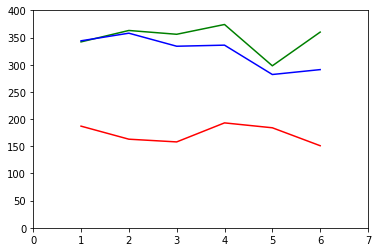

done...


In [16]:
print("Num Pal: ",Palabras_SS)
num_secciones = 6
batch = floor(Palabras_SS / num_secciones)
print(batch)
read_novel_secction(Palabras_SS,batch,num_secciones)
print("done...")